# Examining the Homeless Population of the United States
By Andrew Watkins

## Inferential Statistics

In this section we will do some basic statistics on our dataset. We will check distributions and correraltions between variables. 

In [33]:
#Data Wrangling from previous section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Name the files to use
file_hic_state = 'data/2007-2017-HIC-Counts-by-State.xlsx'
file_pit_state = 'data/2007-2017-PIT-Counts-by-State.xlsx'

# Load spreadsheet
hic_state = pd.ExcelFile(file_hic_state)
pit_state = pd.ExcelFile(file_pit_state)

#HIC
df_hic = pd.DataFrame()

#concat the rest of the sheets to the original df
for sheet in range(2007, 2018): 
    excel_sheet = hic_state.parse(str(sheet), header=1)
    excel_sheet['year'] = str(sheet)
    excel_sheet.set_index(['year','State'], inplace=True)
    df_hic = pd.concat([df_hic, excel_sheet], axis=0, ignore_index=False, sort=True)
    
#Columns were named differenlty before 2014 so we will use all the named variations and then combine them.
columns_to_use = [ "Total Year-Round Beds (ES)",
                   "Total Year-Round ES Beds",
                   "Total Year-Round Beds (TH)",
                   "Total Year-Round TH Beds",
                   "Total Year-Round Beds (SH)",
                   "Total Year-Round SH Beds",
                   "Total Year-Round Beds (PSH)",
                   "Total Year-Round PSH Beds",
                   "Total Year-Round Beds (RRH)",
                   "Total Year-Round RRH Beds",
                   "Total Year-Round Beds (DEM)",
                   "Total Year-Round Beds (OPH)",
]
df_hic = df_hic[columns_to_use]
df_hic.fillna(0.0, inplace=True)


#Here we combine the coumns that contain the same informaiton but were named differently. 
df_hic['Total Year-Round Beds (ES)'] = df_hic['Total Year-Round Beds (ES)'] + df_hic['Total Year-Round ES Beds']
df_hic['Total Year-Round Beds (TH)'] = df_hic['Total Year-Round Beds (TH)'] + df_hic['Total Year-Round TH Beds']
df_hic['Total Year-Round Beds (SH)'] = df_hic['Total Year-Round Beds (SH)'] + df_hic['Total Year-Round SH Beds']
df_hic['Total Year-Round Beds (PSH)'] = df_hic['Total Year-Round Beds (PSH)'] + df_hic['Total Year-Round PSH Beds']
df_hic['Total Year-Round Beds (RRH)'] = df_hic['Total Year-Round Beds (RRH)'] + df_hic['Total Year-Round RRH Beds']

#We drop the extra columns we no longer need.
cols_to_drop = ['Total Year-Round ES Beds',
                'Total Year-Round TH Beds',
                'Total Year-Round SH Beds',
                'Total Year-Round PSH Beds',
                'Total Year-Round RRH Beds']
df_hic.drop(cols_to_drop, axis=1, inplace=True)

#PIT
#Create a new DF with the rest of the sheets. Which are the homeless population in each state from 2007-2017
df_pit = pd.DataFrame()

#concat the rest of the sheets to the original df
for sheet in range(2007, 2018):
    excel_sheet = pit_state.parse(str(sheet))
    excel_sheet['year'] = str(sheet)
    excel_sheet.set_index(['year','State'], inplace=True)
    #rename the columns
    cols_to_use = []
    for column in excel_sheet.columns:
        if column.__contains__(','):
            cols_to_use.append(column.split(',')[0])
        else:
            cols_to_use.append(column)
    excel_sheet.columns = cols_to_use
    df_pit = pd.concat([df_pit, excel_sheet], axis=0, ignore_index=False, sort=True)
    
#There are only two with the note. So we just drop them directly. 
df_pit.drop(level=1, inplace=True, index='Note: The number of CoCs in 2016 was 402. However, MO-604 merged in 2016 and covers territory in both MO and KS, contributing to the PIT count in both states. ')
df_pit.drop(level=1, inplace=True, index='Note: The number of CoCs in 2017 was 399. However, MO-604 merged in 2016 and covers territory in both MO and KS, contributing to the PIT count in both states. ')

#Grab the 2 columns that we need for now
df_pit = df_pit[['Total Homeless', 'Number of CoCs']]
df_pit.fillna(0, inplace=True)
df_pit.replace(to_replace='.', value='0', inplace=True)
df_pit = df_pit.astype(float, copy=False)

#Merge both DF (PIT and HIC) and drop some unecessary columns
df = pd.concat([df_hic, df_pit], axis=1)
df.drop(index=['Total', 'KS*', ' ', 'MP'], level=1, inplace=True)

#Create an aggregate column of the total of all the beds.
df['Total Beds'] = df_hic['Total Year-Round Beds (ES)'] + df_hic['Total Year-Round Beds (TH)'] + df_hic['Total Year-Round Beds (SH)'] + df_hic['Total Year-Round Beds (PSH)'] + df_hic['Total Year-Round Beds (RRH)'] + df_hic['Total Year-Round Beds (DEM)'] + df_hic['Total Year-Round Beds (OPH)']


In [34]:
#I am checking the head of the df to remind ourselves what it looks like
df.head()

Total Year-Round Beds (ES)  Total Year-Round Beds (TH)  \
year State                                                           
2007 AK                         1095.0                       663.0   
     AL                         1766.0                      2607.0   
     AR                         1483.0                      1109.0   
     AZ                         3736.0                      5597.0   
     CA                        20181.0                     30897.0   

            Total Year-Round Beds (SH)  Total Year-Round Beds (PSH)  \
year State                                                            
2007 AK                            0.0                        489.0   
     AL                            0.0                       2420.0   
     AR                            0.0                       1538.0   
     AZ                            0.0                       3019.0   
     CA                            0.0                      26787.0   

            Total Year-Round Beds (RRH)  Total Year-Round Beds (DEM)  \
year State                                                             
2007 AK                             0.0                          0.0   
     AL                             0.0                          0.0   
     AR                             0.0                          0.0   
     AZ                             0.0                          0.0   
     CA                             0.0                          0.0   

            Total Year-Round Beds (OPH)  Total Homeless  Number of CoCs  \
year State                                                                
2007 AK                             0.0          1642.0             2.0   
     AL                             0.0          5452.0             8.0   
     AR                             0.0          3836.0             9.0   
     AZ                             0.0         14646.0             3.0   
     CA                             0.0        138986.0            42.0   

            Total Beds  
year State              
2007 AK         2247.0  
     AL         6793.0  
     AR         4130.0  
     AZ        12352.0  
     CA        77865.0

In [35]:
#We describe the df to see basic stats of our dataframe
df.describe()

,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (PSH),Total Year-Round Beds (RRH),Total Year-Round Beds (DEM),Total Year-Round Beds (OPH),Total Homeless,Number of CoCs,Total Beds
count,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,593.000000,594.000000
mean,4391.454545,3378.599327,34.442761,5017.491582,478.185185,8.011785,208.828283,11182.839798,7.912310,13517.013468
std,8632.767912,4421.310810,51.728350,7912.168142,1172.229084,42.520522,1224.239389,19877.224778,8.553236,19900.731143
min,58.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,337.000000,1.000000,149.000000
25%,1081.000000,813.500000,0.000000,871.250000,0.000000,0.000000,0.000000,2247.000000,2.000000,3091.000000
50%,2230.000000,2158.000000,13.000000,2409.000000,0.000000,0.000000,0.000000,5558.000000,4.000000,7559.500000
75%,4247.000000,3940.250000,45.000000,6016.250000,339.000000,0.000000,5.000000,11671.000000,10.000000,14648.250000
max,81468.000000,31969.000000,282.000000,59836.000000,11817.000000,596.000000,22218.000000,138986.000000,43.000000,135102.000000


In [36]:
#We get a correlation matrix to see what columns are correlated with each other.
corr = df.corr()
corr

,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (PSH),Total Year-Round Beds (RRH),Total Year-Round Beds (DEM),Total Year-Round Beds (OPH),Total Homeless,Number of CoCs,Total Beds
Total Year-Round Beds (ES),1.000000,0.555505,0.548480,0.787216,0.305595,0.051666,0.102184,0.717888,0.624002,0.896013
Total Year-Round Beds (TH),0.555505,1.000000,0.673917,0.828359,0.258754,0.075555,0.096639,0.928819,0.822860,0.815582
Total Year-Round Beds (SH),0.548480,0.673917,1.000000,0.670755,0.285120,0.157298,0.152851,0.635491,0.696626,0.683462
Total Year-Round Beds (PSH),0.787216,0.828359,0.670755,1.000000,0.521336,0.165840,0.205042,0.901042,0.813288,0.968525
Total Year-Round Beds (RRH),0.305595,0.258754,0.285120,0.521336,1.000000,0.299435,0.433937,0.349036,0.320771,0.484304
Total Year-Round Beds (DEM),0.051666,0.075555,0.157298,0.165840,0.299435,1.000000,0.143747,0.058030,0.098229,0.134160
Total Year-Round Beds (OPH),0.102184,0.096639,0.152851,0.205042,0.433937,0.143747,1.000000,0.115995,0.196106,0.235100
Total Homeless,0.717888,0.928819,0.635491,0.901042,0.349036,0.058030,0.115995,1.000000,0.817162,0.905498
Number of CoCs,0.624002,0.822860,0.696626,0.813288,0.320771,0.098229,0.196106,0.817162,1.000000,0.809847
Total Beds,0.896013,0.815582,0.683462,0.968525,0.484304,0.134160,0.235100,0.905498,0.809847,1.000000


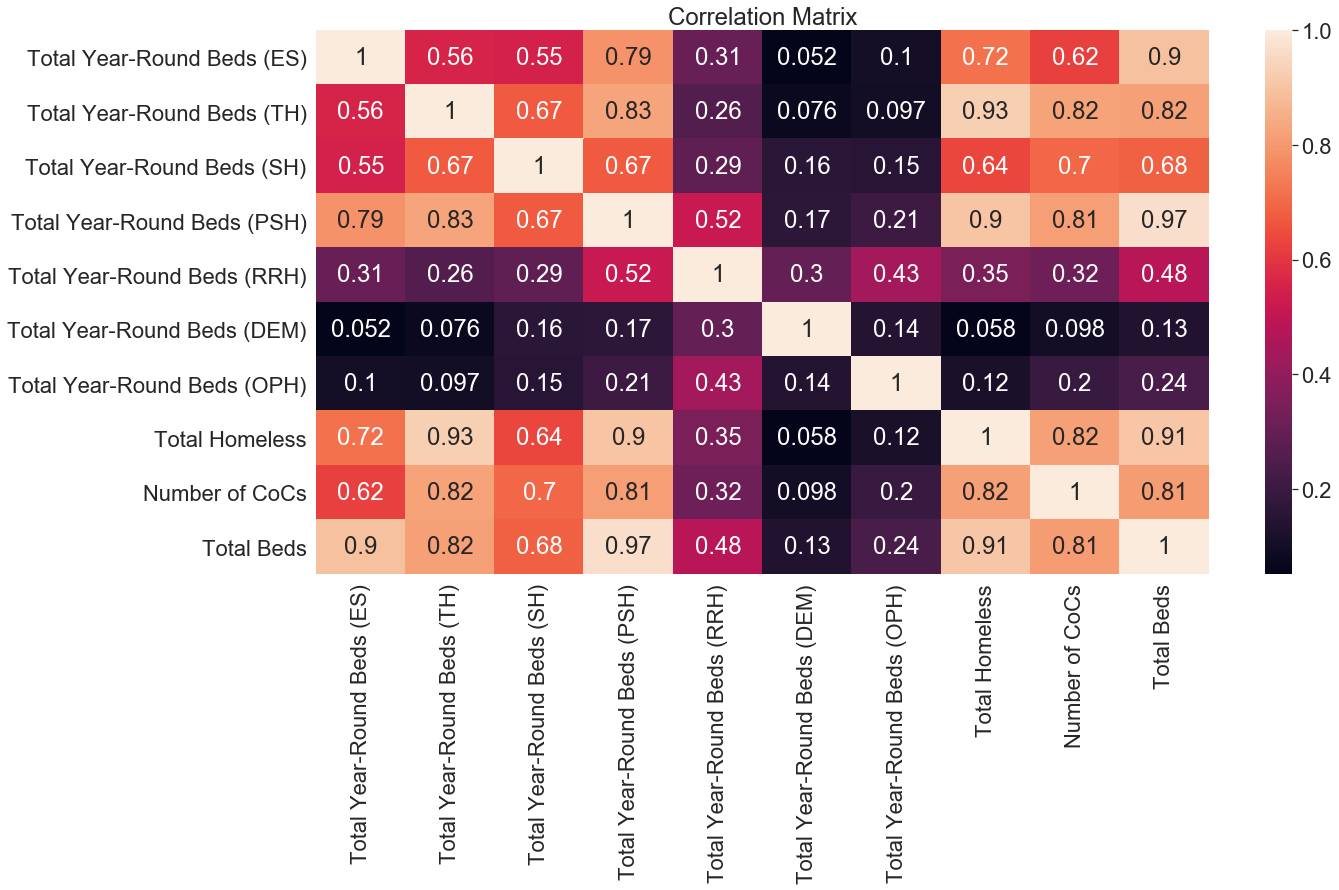

In [87]:
#We dispplay the correlatin matrix to have a better visualization of the correlation
size = (20, 10)
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=size)
sns.heatmap(data=corr,ax=ax, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot=True).set_title('Correlation Matrix')
plt.show()

It looks like Total Homeless and Total Beds has the highest correlation so we will take a closer look at these columns

In [136]:
#Order the correlations of Total homeless
corr = corr.abs().unstack()
sorted_corr = corr.sort_values(ascending=False)
sorted_corr['Total Homeless']

TypeError: sort_values() missing 1 required positional argument: 'by'

In [135]:
#Order the correlations of Total Beds
sorted_corr['Total Beds']

Total Beds                     1.000000
Total Year-Round Beds (PSH)    0.968525
Total Homeless                 0.905498
Total Year-Round Beds (ES)     0.896013
Total Year-Round Beds (TH)     0.815582
Number of CoCs                 0.809847
Total Year-Round Beds (SH)     0.683462
Total Year-Round Beds (RRH)    0.484304
Total Year-Round Beds (OPH)    0.235100
Total Year-Round Beds (DEM)    0.134160
dtype: float64

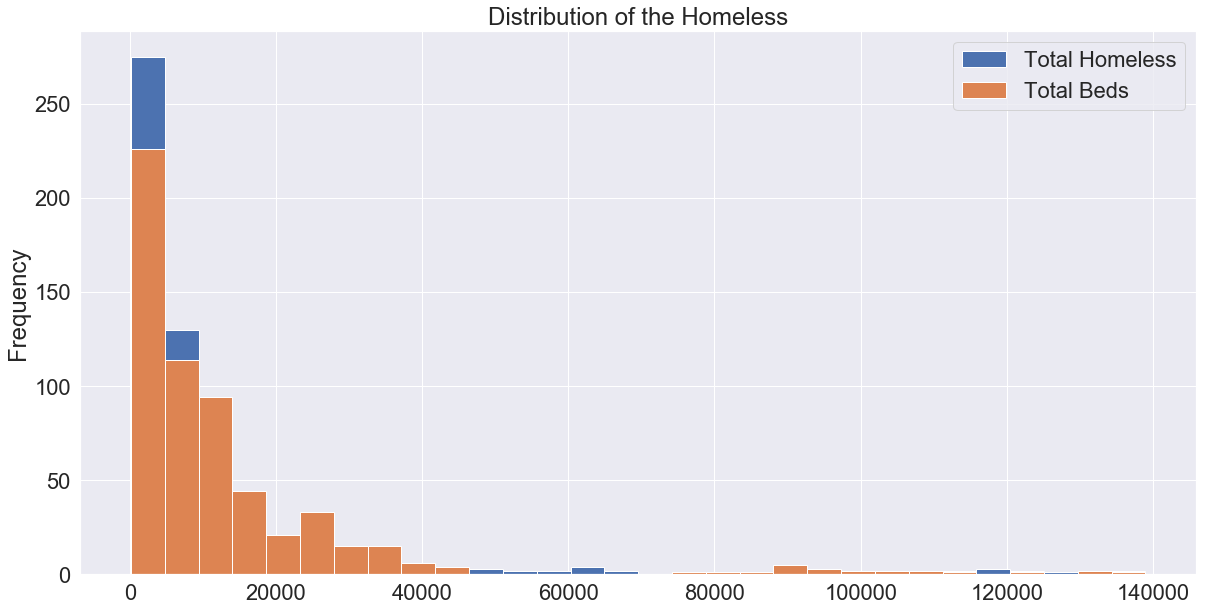

In [38]:
#We plot the distribution of the homeless
df[['Total Homeless','Total Beds']].plot(kind='hist', figsize=(20,10), bins=30, title='Distribution of the Homeless')
plt.show()

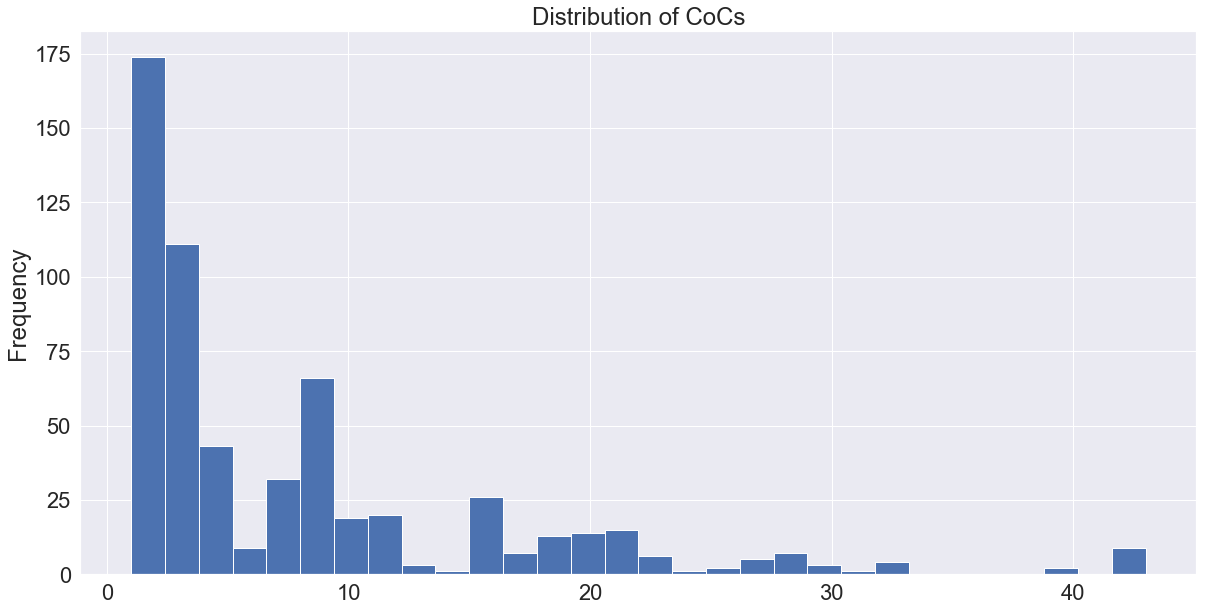

In [39]:
#We plot the distribution of CoCs
df['Number of CoCs'].plot(kind='hist', figsize=(20,10), bins=30, title='Distribution of CoCs')
plt.show()

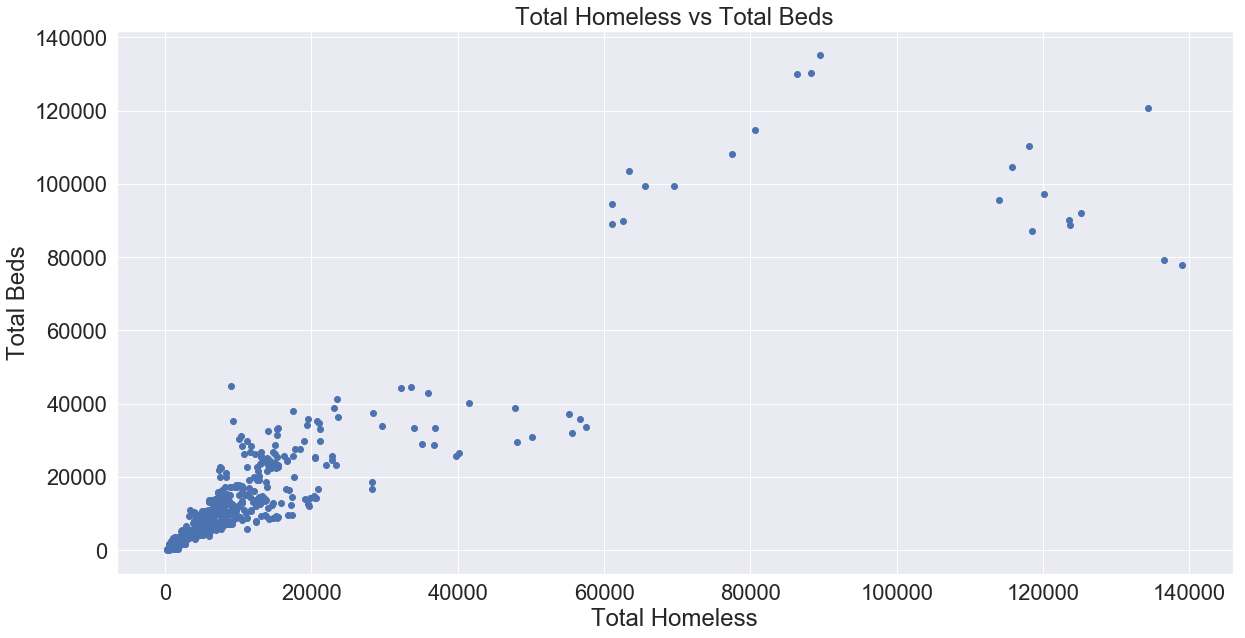

In [40]:
#We plot the of the homeless vs the beds in a scatter plot
fig, ax = plt.subplots(figsize=(20,10))
plt.scatter(x=df['Total Homeless'], y=df['Total Beds'])
plt.xlabel('Total Homeless')
plt.ylabel('Total Beds')
plt.title('Total Homeless vs Total Beds')
plt.show()

When viewing the previous scatter and distribnution plots we notice we have some heavy outliers which can skew our data. So we are going to find them which are the outliers and elimnate them are redo the previous plots.

In [51]:
#we add additional import needed for the following opierations
from scipy import stats
from patsy.builtins import *
import statsmodels.api as sm

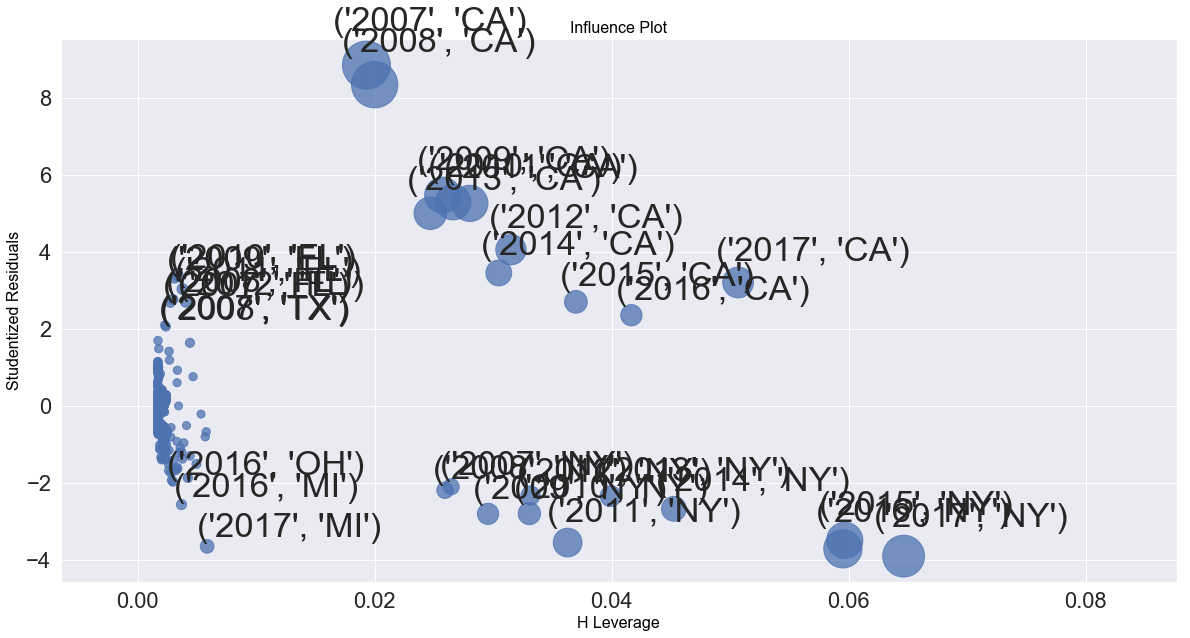

In [119]:
#As we mentioned we need to fin the outliers in our data. I used an influence plot for this.
model = ols("Q('Total Homeless') ~ Q('Total Beds')", df).fit()

fig, ax = plt.subplots(figsize=(20,10))
fig = sm.graphics.influence_plot(model, ax=ax)

In [66]:
#We can clearly see that NY and CA are the outliers. So we proceed to eliminate them.
df_min = df.drop(index=['CA', 'NY'], level=1)

In [86]:
#Double check our stats
df_min.describe()

,Total Year-Round Beds (ES),Total Year-Round Beds (TH),Total Year-Round Beds (SH),Total Year-Round Beds (PSH),Total Year-Round Beds (RRH),Total Year-Round Beds (DEM),Total Year-Round Beds (OPH),Total Homeless,Number of CoCs,Total Beds
count,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,571.000000,571.000000,572.000000
mean,3024.409091,2757.564685,29.697552,3691.722028,420.996503,8.059441,192.346154,7806.175131,6.835377,10124.795455
std,2806.182804,2630.894699,45.086348,3816.416339,965.486995,43.053381,1222.364517,8579.993924,6.560718,9508.969028
min,58.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,337.000000,1.000000,149.000000
25%,1004.750000,738.500000,0.000000,838.000000,0.000000,0.000000,0.000000,2163.500000,2.000000,2942.250000
50%,1991.000000,2086.000000,12.000000,2199.500000,0.000000,0.000000,0.000000,5229.000000,4.000000,7053.000000
75%,4023.000000,3633.250000,42.250000,5600.250000,321.250000,0.000000,0.500000,10524.000000,9.000000,13577.500000
max,13961.000000,14022.000000,282.000000,17817.000000,7424.000000,596.000000,22218.000000,57551.000000,28.000000,44881.000000


C:\Users\Warvold\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


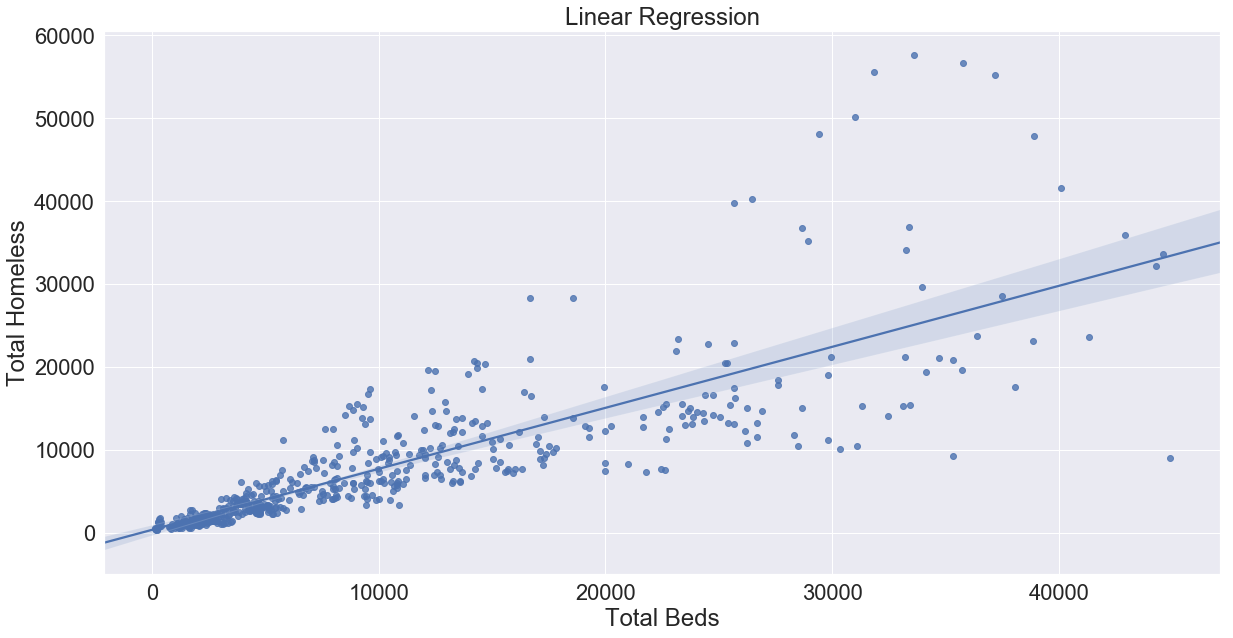

In [78]:
#We now create a linear regression plot
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=size)
sns.regplot(y='Total Homeless', x='Total Beds', data=df_min, fit_reg = True)
plt.title('Linear Regression')
plt.show()

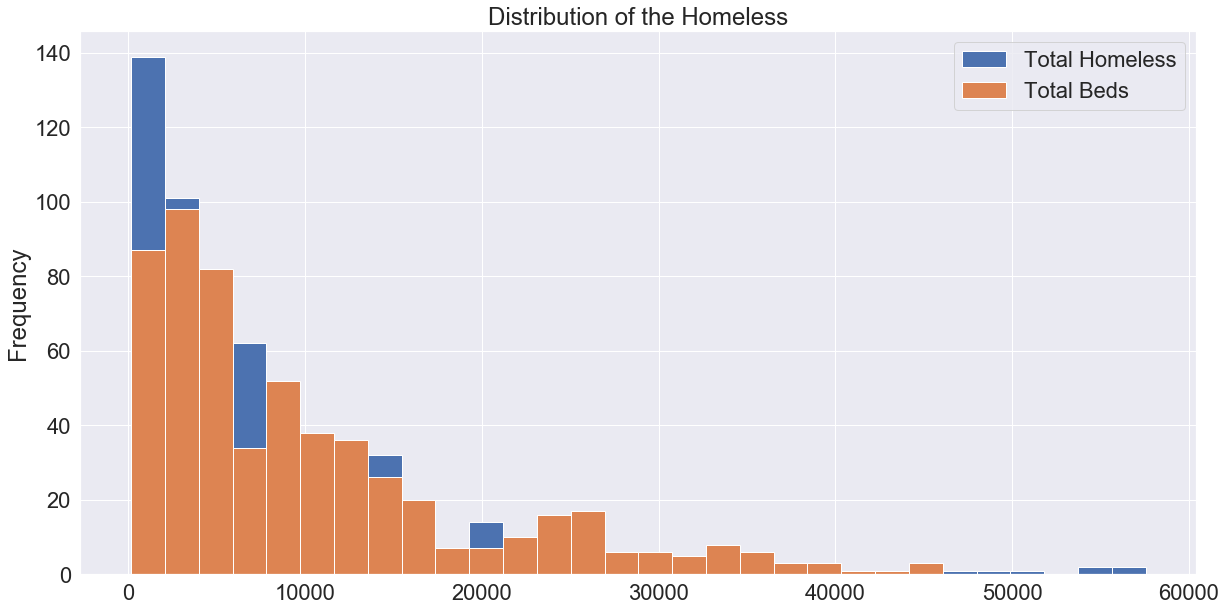

In [84]:
#We double check our distributions
df_min[['Total Homeless','Total Beds']].plot(kind='hist', figsize=(20,10), bins=30, title='Distribution of the Homeless')
plt.show()

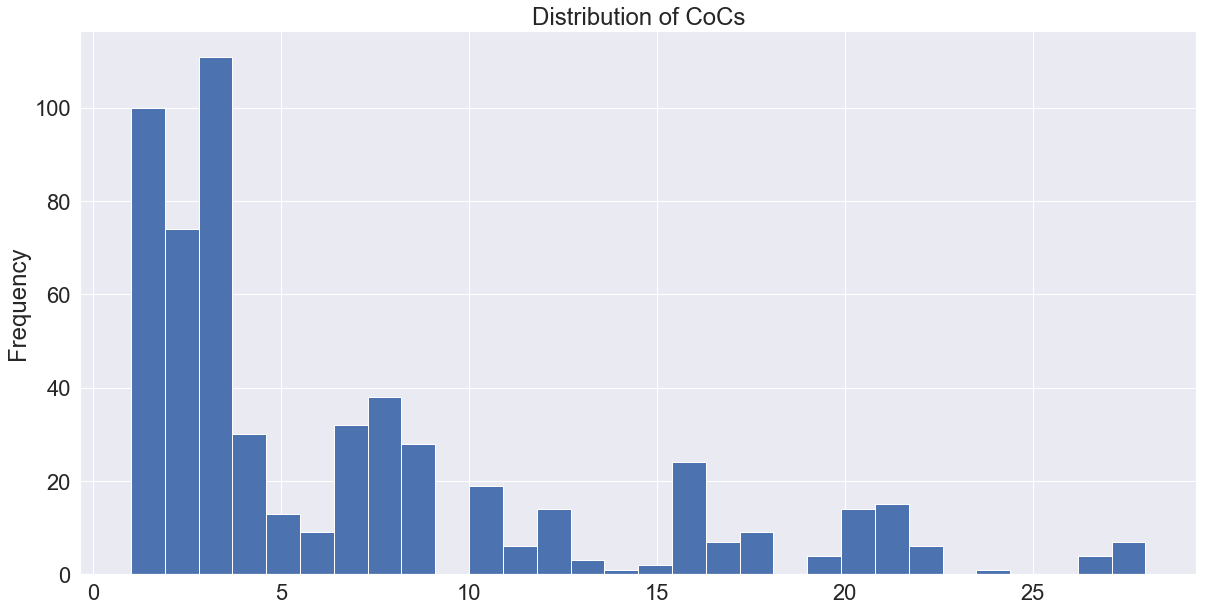

In [85]:
#Double check the CoC distribution
df_min['Number of CoCs'].plot(kind='hist', figsize=(20,10), bins=30, title='Distribution of CoCs')
plt.show()

It seems that eliminating CA and NY has changed the distributions and even the scatter plot/linear regression plots significantly. Which is something very important to take into account when trying to predict beds based on the homeless population. 